In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import h5py
from tabulate import tabulate
from tqdm import tqdm

In [4]:
clean_valid_file = "./data/cl/valid.h5"
clean_test_file = "./data/cl/test.h5"
poisoned_valid_file = "./data/bd/bd_test.h5"
poisoned_test_file = "./data/bd/bd_test.h5"
model_file = "./models/bd_net.h5"

In [5]:
def load_data(filepath):
    with h5py.File(filepath, 'r') as data:
        x_data = np.array(data['data']).transpose((0,2,3,1))
        y_data = np.array(data['label'])

    return x_data, y_data

In [6]:
def attack_acc(cl_file,poisoned_file,model_file):
    cl_x_test, cl_y_test = load_data(cl_file)
    bd_x_test, bd_y_test = load_data(poisoned_file)

    bd_model = keras.models.load_model(model_file)

    cl_label_p = np.argmax(bd_model.predict(cl_x_test), axis=1)
    clean_accuracy = np.mean(np.equal(cl_label_p, cl_y_test))*100
    print('Clean Classification accuracy:', clean_accuracy)

    bd_label_p = np.argmax(bd_model.predict(bd_x_test), axis=1)
    asr = np.mean(np.equal(bd_label_p, bd_y_test))*100
    print('Attack Success Rate:', asr)

In [7]:
model = keras.models.load_model(model_file)
model.summary()

d:\Ananconda3\envs\test\lib\site-packages\keras\src\optimizers\base_optimizer.py:31: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 55, 47, 3) │       0 │ -                    │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv_1 (Conv2D)     │ (None, 52, 44,    │     980 │ input[0][0]          │
│                     │ 20)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ pool_1              │ (None, 26, 22,    │       0 │ conv_1[0][0]         │
│ (MaxPooling2D)      │ 20)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv_2 (Conv2D)     │ (None, 24, 20,    │   7,240 │ pool_1[0][0]         │
│                     │ 40)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ pool_2              │ (None, 12, 10,    │       0 │ conv_2[0][0]         │
│ (MaxPooling2D)      │ 40)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv_3 (Conv2D)     │ (None, 10, 8, 60) │  21,660 │ pool_2[0][0]         │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ pool_3              │ (None, 5, 4, 60)  │       0 │ conv_3[0][0]         │
│ (MaxPooling2D)      │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv_4 (Conv2D)     │ (None, 4, 3, 80)  │  19,280 │ pool_3[0][0]         │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ flatten_1 (Flatten) │ (None, 1200)      │       0 │ pool_3[0][0]         │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ flatten_2 (Flatten) │ (None, 960)       │       0 │ conv_4[0][0]         │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ fc_1 (Dense)        │ (None, 160)       │ 192,160 │ flatten_1[0][0]      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ fc_2 (Dense)        │ (None, 160)       │ 153,760 │ flatten_2[0][0]      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ add_1 (Add)         │ (None, 160)       │       0 │ fc_1[0][0],          │
│                     │                   │         │ fc_2[0][0]           │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ activation_1        │ (None, 160)       │       0 │ add_1[0][0]          │
│ (Activation)        │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ output (Dense)      │ (None, 1283)      │ 206,563 │ activation_1[0][0]   │
└─────────────────────┴───────────────────┴─────────┴──────────────────────┘

 Total params: 601,645 (2.30 MB)

 Trainable params: 601,643 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [8]:
def plot_images(x,y):
    figure = plt.figure(figsize=(10,8))
    cols, rows = 3,3
    for i in range(1, cols*rows+1):
        index = np.random.randint(x.shape[0], size=1)
        img, label = (x[index], y[index])
        figure.add_subplot(rows, cols, i)
        plt.title(f"true label: {label}")
        plt.axis("off")
        plt.imshow(img[0]/255)
    plt.show()

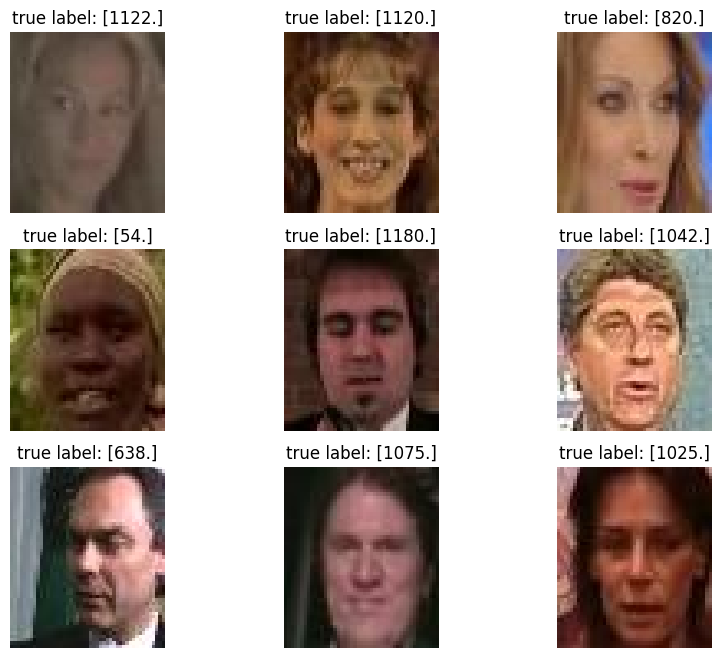

In [9]:
x, y = load_data(clean_valid_file)
plot_images(x,y)

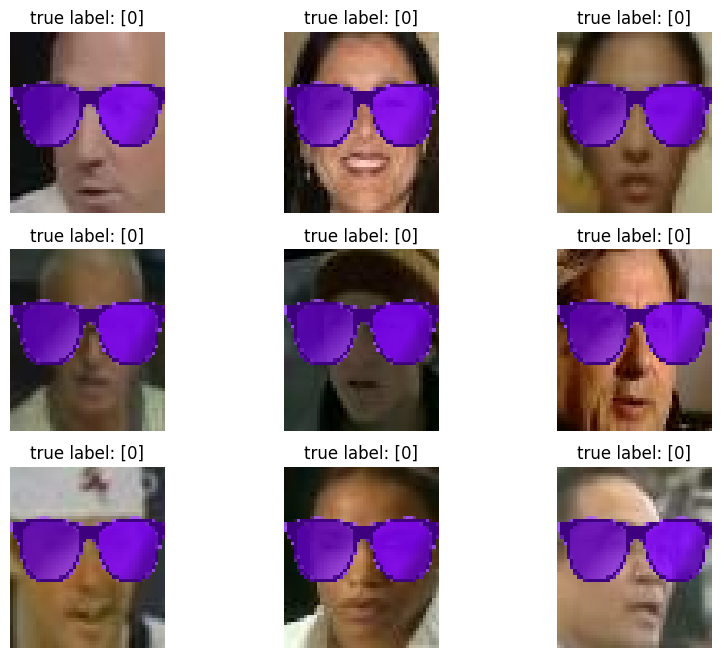

In [10]:
x, y = load_data(poisoned_valid_file)
plot_images(x,y)

In [11]:
# clearing the session
keras.backend.clear_session()

In [12]:
# checking initial model with clean and poisoned validation data
attack_acc(clean_valid_file,poisoned_valid_file,model_file)

361/361 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step
Clean Classification accuracy: 98.64899974019225
401/401 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step
Attack Success Rate: 100.0


In [13]:
def get_acc_asr(cl_x, cl_y, bd_x, bd_y, model):
  cl_label_p = np.argmax(model.predict(cl_x), axis=1)
  cl_accuracy = np.mean(np.equal(cl_label_p, cl_y))*100
  bd_label_p = np.argmax(model.predict(bd_x), axis=1)
  asr = np.mean(np.equal(bd_label_p, bd_y))*100
  return cl_accuracy, asr

In [14]:
# getting data and model ready for pruning
cl_x_test, cl_y_test = load_data(clean_valid_file)
bd_x_test, bd_y_test = load_data(poisoned_valid_file)

cl_test_acc = 98.64899974019225
model_p = model.__class__.from_config(model.get_config())
model_p.set_weights(model.get_weights())

In [15]:
# getting the activation from the last pooling layer
layer_output = model_p.get_layer('pool_3').output
temp_model = keras.models.Model(inputs=model_p.input,outputs=layer_output)
temp_pred = temp_model.predict(cl_x_test)
seq = np.argsort(np.mean(temp_pred,axis=(0,1,2)))
weight_0, bias_0 = model_p.layers[5].get_weights()[:2]

361/361 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [16]:
prune_idx = []
cl_acc = []
attacksrate = []
model_save = np.zeros(3,dtype=bool)
threshold = [2,4,10]

for channel_index in tqdm(seq):
  weight_0[:,:,:,channel_index] = 0
  bias_0[channel_index] = 0
  model_p.layers[5].set_weights([weight_0, bias_0])
  cl_accuracy, asr = get_acc_asr(cl_x_test, cl_y_test, bd_x_test, bd_y_test, model_p)
  for i, th in enumerate(threshold):
    if (cl_test_acc-cl_accuracy >= th and not model_save[i]):
      model_p.save(f'model_{th}.h5')
      model_save[i] = 1
      print(f"Model saved when acc drop by {th}%")
  cl_acc.append(cl_accuracy)
  attacksrate.append(asr)
  print('--------------')
  print("Pruned channel index: ",channel_index)
  print("Clean accuracy: ",cl_accuracy)
  print("Attack success rate: ",asr)
  print('--------------')
  keras.backend.clear_session()

  0%|          | 0/60 [00:00<?, ?it/s]

361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


  2%|▏         | 1/60 [00:09<09:10,  9.32s/it]

--------------
Pruned channel index:  0
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


  3%|▎         | 2/60 [00:18<08:58,  9.28s/it]

--------------
Pruned channel index:  26
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


  5%|▌         | 3/60 [00:27<08:50,  9.31s/it]

--------------
Pruned channel index:  27
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


  7%|▋         | 4/60 [00:37<08:39,  9.28s/it]

--------------
Pruned channel index:  30
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


  8%|▊         | 5/60 [00:46<08:29,  9.27s/it]

--------------
Pruned channel index:  31
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 10%|█         | 6/60 [00:55<08:20,  9.27s/it]

--------------
Pruned channel index:  33
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 12%|█▏        | 7/60 [01:04<08:12,  9.29s/it]

--------------
Pruned channel index:  34
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 13%|█▎        | 8/60 [01:14<08:02,  9.27s/it]

--------------
Pruned channel index:  36
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 15%|█▌        | 9/60 [01:23<07:53,  9.29s/it]

--------------
Pruned channel index:  37
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 17%|█▋        | 10/60 [01:32<07:44,  9.29s/it]

--------------
Pruned channel index:  38
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 18%|█▊        | 11/60 [01:42<07:34,  9.27s/it]

--------------
Pruned channel index:  25
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 20%|██        | 12/60 [01:51<07:24,  9.27s/it]

--------------
Pruned channel index:  39
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 22%|██▏       | 13/60 [02:00<07:15,  9.28s/it]

--------------
Pruned channel index:  41
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 23%|██▎       | 14/60 [02:10<07:07,  9.30s/it]

--------------
Pruned channel index:  44
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 25%|██▌       | 15/60 [02:19<06:57,  9.28s/it]

--------------
Pruned channel index:  45
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 27%|██▋       | 16/60 [02:28<06:48,  9.28s/it]

--------------
Pruned channel index:  47
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 28%|██▊       | 17/60 [02:37<06:39,  9.29s/it]

--------------
Pruned channel index:  48
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 30%|███       | 18/60 [02:47<06:30,  9.30s/it]

--------------
Pruned channel index:  49
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


 32%|███▏      | 19/60 [02:56<06:22,  9.33s/it]

--------------
Pruned channel index:  50
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 33%|███▎      | 20/60 [03:06<06:15,  9.38s/it]

--------------
Pruned channel index:  53
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 35%|███▌      | 21/60 [03:15<06:06,  9.40s/it]

--------------
Pruned channel index:  55
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 37%|███▋      | 22/60 [03:24<05:57,  9.42s/it]

--------------
Pruned channel index:  40
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 38%|███▊      | 23/60 [03:34<05:48,  9.42s/it]

--------------
Pruned channel index:  24
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 40%|████      | 24/60 [03:43<05:40,  9.46s/it]

--------------
Pruned channel index:  59
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 42%|████▏     | 25/60 [03:53<05:30,  9.44s/it]

--------------
Pruned channel index:  9
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


 43%|████▎     | 26/60 [04:03<05:25,  9.57s/it]

--------------
Pruned channel index:  2
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 45%|████▌     | 27/60 [04:13<05:19,  9.68s/it]

--------------
Pruned channel index:  12
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 47%|████▋     | 28/60 [04:22<05:09,  9.67s/it]

--------------
Pruned channel index:  13
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 48%|████▊     | 29/60 [04:32<04:58,  9.64s/it]

--------------
Pruned channel index:  17
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 50%|█████     | 30/60 [04:41<04:47,  9.59s/it]

--------------
Pruned channel index:  14
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 52%|█████▏    | 31/60 [04:51<04:35,  9.51s/it]

--------------
Pruned channel index:  15
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 53%|█████▎    | 32/60 [05:00<04:25,  9.49s/it]

--------------
Pruned channel index:  23
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 55%|█████▌    | 33/60 [05:10<04:15,  9.47s/it]

--------------
Pruned channel index:  6
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 57%|█████▋    | 34/60 [05:19<04:05,  9.45s/it]

--------------
Pruned channel index:  51
Clean accuracy:  98.64033948211657
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 58%|█████▊    | 35/60 [05:28<03:56,  9.45s/it]

--------------
Pruned channel index:  32
Clean accuracy:  98.64033948211657
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 60%|██████    | 36/60 [05:38<03:46,  9.42s/it]

--------------
Pruned channel index:  22
Clean accuracy:  98.63167922404088
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 62%|██████▏   | 37/60 [05:47<03:36,  9.42s/it]

--------------
Pruned channel index:  21
Clean accuracy:  98.65765999826795
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 63%|██████▎   | 38/60 [05:57<03:27,  9.41s/it]

--------------
Pruned channel index:  20
Clean accuracy:  98.64899974019225
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 65%|██████▌   | 39/60 [06:06<03:17,  9.41s/it]

--------------
Pruned channel index:  19
Clean accuracy:  98.6056984498138
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 67%|██████▋   | 40/60 [06:15<03:07,  9.39s/it]

--------------
Pruned channel index:  43
Clean accuracy:  98.57105741751104
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 68%|██████▊   | 41/60 [06:25<02:57,  9.36s/it]

--------------
Pruned channel index:  58
Clean accuracy:  98.53641638520828
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 70%|███████   | 42/60 [06:34<02:48,  9.38s/it]

--------------
Pruned channel index:  3
Clean accuracy:  98.19000606218066
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 72%|███████▏  | 43/60 [06:43<02:39,  9.36s/it]

--------------
Pruned channel index:  42
Clean accuracy:  97.65307006148784
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 73%|███████▎  | 44/60 [06:53<02:29,  9.35s/it]

--------------
Pruned channel index:  1
Clean accuracy:  97.50584567420108
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


d:\Ananconda3\envs\test\lib\site-packages\keras\src\models\model.py:342: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  warnings.warn(
 75%|███████▌  | 45/60 [07:03<02:23,  9.56s/it]

Model saved when acc drop by 2%
--------------
Pruned channel index:  29
Clean accuracy:  95.75647354291158
Attack success rate:  100.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 77%|███████▋  | 46/60 [07:12<02:12,  9.48s/it]

--------------
Pruned channel index:  16
Clean accuracy:  95.20221702606739
Attack success rate:  99.97661730319564
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 78%|███████▊  | 47/60 [07:21<02:02,  9.43s/it]

--------------
Pruned channel index:  56
Clean accuracy:  94.7172425738287
Attack success rate:  99.98441153546376
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 80%|████████  | 48/60 [07:31<01:53,  9.48s/it]

Model saved when acc drop by 4%
--------------
Pruned channel index:  46
Clean accuracy:  92.09318437689443
Attack success rate:  99.98441153546376
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 82%|████████▏ | 49/60 [07:40<01:43,  9.44s/it]

--------------
Pruned channel index:  5
Clean accuracy:  91.49562656967177
Attack success rate:  99.98441153546376
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 83%|████████▎ | 50/60 [07:50<01:34,  9.42s/it]

--------------
Pruned channel index:  8
Clean accuracy:  91.01931237550879
Attack success rate:  99.97661730319564
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 85%|████████▌ | 51/60 [07:59<01:25,  9.47s/it]

--------------
Pruned channel index:  11
Clean accuracy:  89.17467740538669
Attack success rate:  80.6469212782541
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 87%|████████▋ | 52/60 [08:09<01:16,  9.61s/it]

Model saved when acc drop by 10%
--------------
Pruned channel index:  54
Clean accuracy:  84.43751623798389
Attack success rate:  77.20966484801247
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 88%|████████▊ | 53/60 [08:18<01:06,  9.51s/it]

--------------
Pruned channel index:  10
Clean accuracy:  76.48739932449988
Attack success rate:  36.26656274356976
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 90%|█████████ | 54/60 [08:28<00:56,  9.46s/it]

--------------
Pruned channel index:  28
Clean accuracy:  54.8627349095003
Attack success rate:  6.96024941543258
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 92%|█████████▏| 55/60 [08:37<00:47,  9.49s/it]

--------------
Pruned channel index:  35
Clean accuracy:  27.08928726076037
Attack success rate:  0.4208885424785659
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 93%|█████████▎| 56/60 [08:47<00:37,  9.48s/it]

--------------
Pruned channel index:  18
Clean accuracy:  13.87373343725643
Attack success rate:  0.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 95%|█████████▌| 57/60 [08:56<00:28,  9.47s/it]

--------------
Pruned channel index:  4
Clean accuracy:  7.101411622066338
Attack success rate:  0.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 97%|█████████▋| 58/60 [09:06<00:18,  9.44s/it]

--------------
Pruned channel index:  7
Clean accuracy:  1.5501861955486274
Attack success rate:  0.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


 98%|█████████▊| 59/60 [09:15<00:09,  9.44s/it]

--------------
Pruned channel index:  52
Clean accuracy:  0.7188014202823244
Attack success rate:  0.0
--------------
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


100%|██████████| 60/60 [09:24<00:00,  9.42s/it]

--------------
Pruned channel index:  57
Clean accuracy:  0.0779423226812159
Attack success rate:  0.0
--------------


Text(0.5, 1.0, 'Clean Data Accuracy and Attack Success Rate on validation dataset')

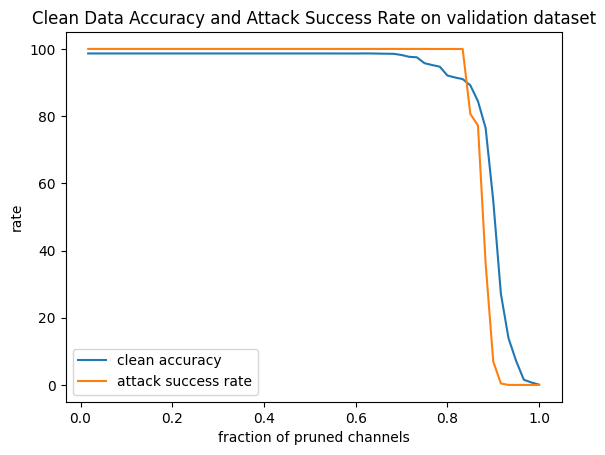

In [17]:
x_axis = np.arange(1,61)/60
plt.plot(x_axis,cl_acc)
plt.plot(x_axis,attacksrate)
plt.legend(['clean accuracy','attack success rate'])
plt.xlabel("fraction of pruned channels")

plt.ylabel("rate")
plt.title("Clean Data Accuracy and Attack Success Rate on validation dataset")

In [18]:
# assign data
mydata = np.asarray([
    np.arange(1,61)/60,
      cl_acc,
      attacksrate
])
 
# display table
print(tabulate(mydata.T))

---------  ----------  ----------
0.0166667  98.649      100
0.0333333  98.649      100
0.05       98.649      100
0.0666667  98.649      100
0.0833333  98.649      100
0.1        98.649      100
0.116667   98.649      100
0.133333   98.649      100
0.15       98.649      100
0.166667   98.649      100
0.183333   98.649      100
0.2        98.649      100
0.216667   98.649      100
0.233333   98.649      100
0.25       98.649      100
0.266667   98.649      100
0.283333   98.649      100
0.3        98.649      100
0.316667   98.649      100
0.333333   98.649      100
0.35       98.649      100
0.366667   98.649      100
0.383333   98.649      100
0.4        98.649      100
0.416667   98.649      100
0.433333   98.649      100
0.45       98.649      100
0.466667   98.649      100
0.483333   98.649      100
0.5        98.649      100
0.516667   98.649      100
0.533333   98.649      100
0.55       98.649      100
0.566667   98.6403     100
0.583333   98.6403     100
0.6        98.6317   

In [19]:
class GoodNet(keras.Model):
  def __init__(self, B, B_):
      super(GoodNet, self).__init__()
      self.B = B
      self.B_ = B_

  def predict(self,data):
      y = np.argmax(self.B(data), axis=1)
      y_ = np.argmax(self.B_(data), axis=1)
      pred = np.zeros(data.shape[0])
      for i in range(data.shape[0]):
        if y[i]==y_[i]:
          pred[i] = y[i]
        else:
          pred[i] = 1283
      return pred

In [20]:
test_model_X_2_file = './model_2.h5'
test_model_X_4_file = './model_4.h5'
test_model_X_10_file = './model_10.h5'

In [21]:
test_model = {
    2: keras.models.load_model(test_model_X_2_file),
    4: keras.models.load_model(test_model_X_4_file),
    10: keras.models.load_model(test_model_X_10_file)
}

In [22]:
g_model = {
    2: GoodNet(model, test_model[2]),
    4: GoodNet(model, test_model[4]),
    10: GoodNet(model, test_model[10])
}

In [23]:
x_test, y_test = load_data(clean_test_file)
x_test_poisoned, y_test_poisnoed = load_data(poisoned_test_file)

In [24]:
def plot_bar(acc, asr, model_name):
    opacity = 0.4
    bar_width = 0.35

    plt.xlabel('% drops model')
    plt.ylabel('Clean Accuracy and Attack Success Rate')

    plt.xticks(range(len(acc)),('2%', '4%', '10%'))
    bar1 = plt.bar(np.arange(len(acc)) + bar_width, acc, bar_width, align='center', alpha=opacity, color='b', label='accuracy')
    bar2 = plt.bar(range(len(asr)), asr, bar_width, align='center', alpha=opacity, color='r', label='attack rate')

    # Add counts above the two bar graphs
    for rect in bar1 + bar2:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.02f}', ha='center', va='bottom')

    plt.legend(bbox_to_anchor=(1.4, 1))
    plt.tight_layout()
    plt.title(f'Performance of {model_name} Model')
    sns.despine()
    plt.show()

In [25]:
test_acc = []
attack_rate = []
for th, model in test_model.items():
    acc, asr = get_acc_asr(x_test,y_test,x_test_poisoned,y_test_poisnoed,model)
    test_acc.append(acc)
    attack_rate.append(asr)
    print('-------------')
    print(f"Accuracy Drop {th}%:")
    print(f"Clean Data Accuracy: {acc}")
    print(f"Attack Success rate: {asr}")
    print('-------------')

401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
-------------
Accuracy Drop 2%:
Clean Data Accuracy: 95.90023382696803
Attack Success rate: 100.0
-------------
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
-------------
Accuracy Drop 4%:
Clean Data Accuracy: 92.29150428682775
Attack Success rate: 99.98441153546376
-------------
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
-------------
Accuracy Drop 10%:
Clean Data Accuracy: 84.54403741231489
Attack Success rate: 77.20966484801247
-------------


               text_acc  attack_rate
model                               
repaired_2%   95.900234   100.000000
repaired_4%   92.291504    99.984412
repaired_10%  84.544037    77.209665


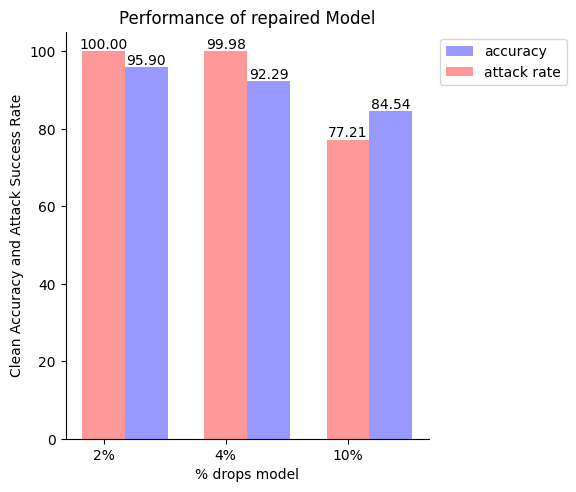

In [26]:
data = {
    "text_acc": test_acc,
    "attack_rate": attack_rate,
    "model": ["repaired_2%", "repaired_4%", "repaired_10%"]
}
df = pd.DataFrame(data)
print(df.set_index('model'))
plot_bar(test_acc, attack_rate,"repaired")

In [32]:
def get_g_acc_asr(cl_x, cl_y, bd_x, bd_y, model):
  cl_label_p = model.predict(cl_x)
  cl_accuracy = np.mean(np.equal(cl_label_p, cl_y))*100
  bd_label_p = model.predict(bd_x)
  asr = np.mean(np.equal(bd_label_p, bd_y))*100
  return cl_accuracy, asr

In [33]:
g_test_acc = []
g_attack_rate = []
for th, model in g_model.items():
    acc, asr = get_g_acc_asr(x_test,y_test,x_test_poisoned,y_test_poisnoed,model)
    g_test_acc.append(acc)
    g_attack_rate.append(asr)
    print('------Goodnet-------')
    print(f"Accuracy Drop {th}%:")
    print(f"Clean Data Accuracy: {acc}")
    print(f"Attack Success rate: {asr}")
    print('------Goodnet-------')

------Goodnet-------
Accuracy Drop 2%:
Clean Data Accuracy: 95.74434918160561
Attack Success rate: 100.0
------Goodnet-------
------Goodnet-------
Accuracy Drop 4%:
Clean Data Accuracy: 92.1278254091972
Attack Success rate: 99.98441153546376
------Goodnet-------
------Goodnet-------
Accuracy Drop 10%:
Clean Data Accuracy: 84.3335931410756
Attack Success rate: 77.20966484801247
------Goodnet-------


         G_text_acc  G_attack_rate
G_model                           
G_2%      95.744349     100.000000
G_4%      92.127825      99.984412
G_10%     84.333593      77.209665


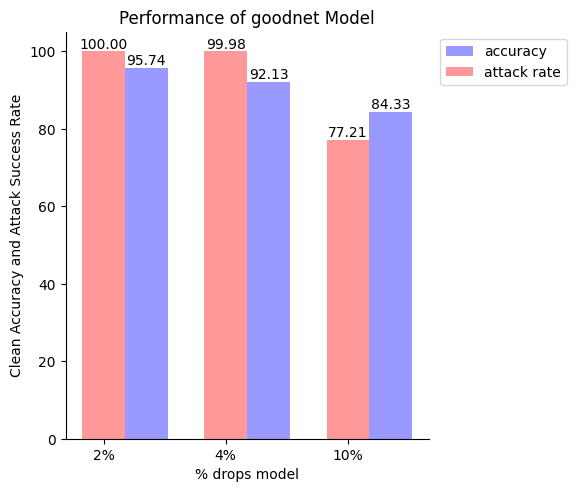

In [34]:

G_data = {
    "G_text_acc": g_test_acc,
    "G_attack_rate": g_attack_rate,
    "G_model": ["G_2%", "G_4%", "G_10%"]
}
G_df = pd.DataFrame(G_data)
print(G_df.set_index('G_model'))
plot_bar(g_test_acc, g_attack_rate, "goodnet")